In [89]:
import numpy as np
import pandas as pd
import eda_helper_functions
from sklearn.ensemble import IsolationForest
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("F:/Data Science/EDA_with_Sagemaker/dataset/train.csv")

In [3]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1,No Info,6152


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          6695 non-null   object
 1   date_of_journey  6695 non-null   object
 2   source           6695 non-null   object
 3   destination      6695 non-null   object
 4   dep_time         6695 non-null   object
 5   arrival_time     6695 non-null   object
 6   duration         6695 non-null   int64 
 7   total_stops      6695 non-null   int64 
 8   additional_info  6695 non-null   object
 9   price            6695 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 523.2+ KB


- Some of the columns have dtypes issue so let's correct there dtypes

In [5]:
(
train
    .assign(**{
        col : pd.to_datetime(train[col], dayfirst=True, format='mixed') for col in ['date_of_journey', 'arrival_time', 'dep_time']
    })
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6695 non-null   int64         
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 523.2+ KB


In [6]:
train = (
train
    .assign(**{
        col : pd.to_datetime(train[col], dayfirst=True, format='mixed') for col in ['date_of_journey', 'arrival_time', 'dep_time']
    })
)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-10-01 08:55:00,2024-10-01 19:10:00,615,1,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-10-01 17:30:00,2024-10-01 04:25:00,655,1,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-10-01 11:40:00,2024-10-01 14:35:00,175,0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-10-01 09:25:00,2024-10-01 18:30:00,545,1,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-10-01 22:55:00,2024-10-01 07:40:00,525,1,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-10-01 10:45:00,2024-10-01 18:50:00,1925,2,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,2024-10-01 09:25:00,2024-10-01 18:30:00,545,1,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,2024-10-01 14:00:00,2024-10-01 19:00:00,300,1,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-10-01 07:55:00,2024-10-01 13:25:00,330,1,No Info,6152


In [7]:
train.describe(include='number')

,duration,total_stops,price
count,6695.000000,6695.000000,6695.000000
mean,633.489171,0.801344,9030.965646
std,503.006311,0.659760,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [8]:
(
train
    .assign(total_stops = train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6695,6695
unique,12,5,6,4,7
top,Jet Airways,Delhi,Cochin,1,No Info
freq,2386,2730,2730,3580,5249


- We can see occurrence of most often value and the value itself, with all unique values.

### Finding missing values
- Tells us about count and percentage of missing value in each column
    -In our case data is cleaned that's why no output  

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## Getting overall analysis for outliers

In [10]:
forest = IsolationForest(n_estimators=100) 

In [11]:
(
train
    .drop('price',axis=1)
    .assign(
        outlier = forest.fit_predict(
            train 
            .select_dtypes(include='number'))
    )
    .query('outlier==-1')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,outlier
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-10-01 05:45:00,2024-10-01 07:15:00,90,0,No check-in baggage included,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-10-01 23:05:00,2024-10-01 04:25:00,1760,2,No Info,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-10-01 21:25:00,2024-10-01 19:00:00,1295,2,No Info,-1
21,Jet Airways,2019-06-01,Delhi,Cochin,2024-10-01 18:25:00,2024-10-01 12:35:00,1090,2,No Info,-1
23,Spicejet,2019-06-18,Mumbai,Hyderabad,2024-10-01 13:15:00,2024-10-01 14:45:00,90,0,No Info,-1
...,...,...,...,...,...,...,...,...,...,...
6683,Jet Airways,2019-05-01,Kolkata,Banglore,2024-10-01 09:35:00,2024-10-01 14:25:00,1730,1,No Info,-1
6687,Air India,2019-06-06,Kolkata,Banglore,2024-10-01 05:50:00,2024-10-01 08:55:00,1625,2,No Info,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-10-01 21:25:00,2024-10-01 12:35:00,910,2,In-flight meal not included,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-10-01 09:10:00,2024-10-01 10:40:00,90,0,No Info,-1


- Pair plors function is designed in a way that it will only select the numerical columns

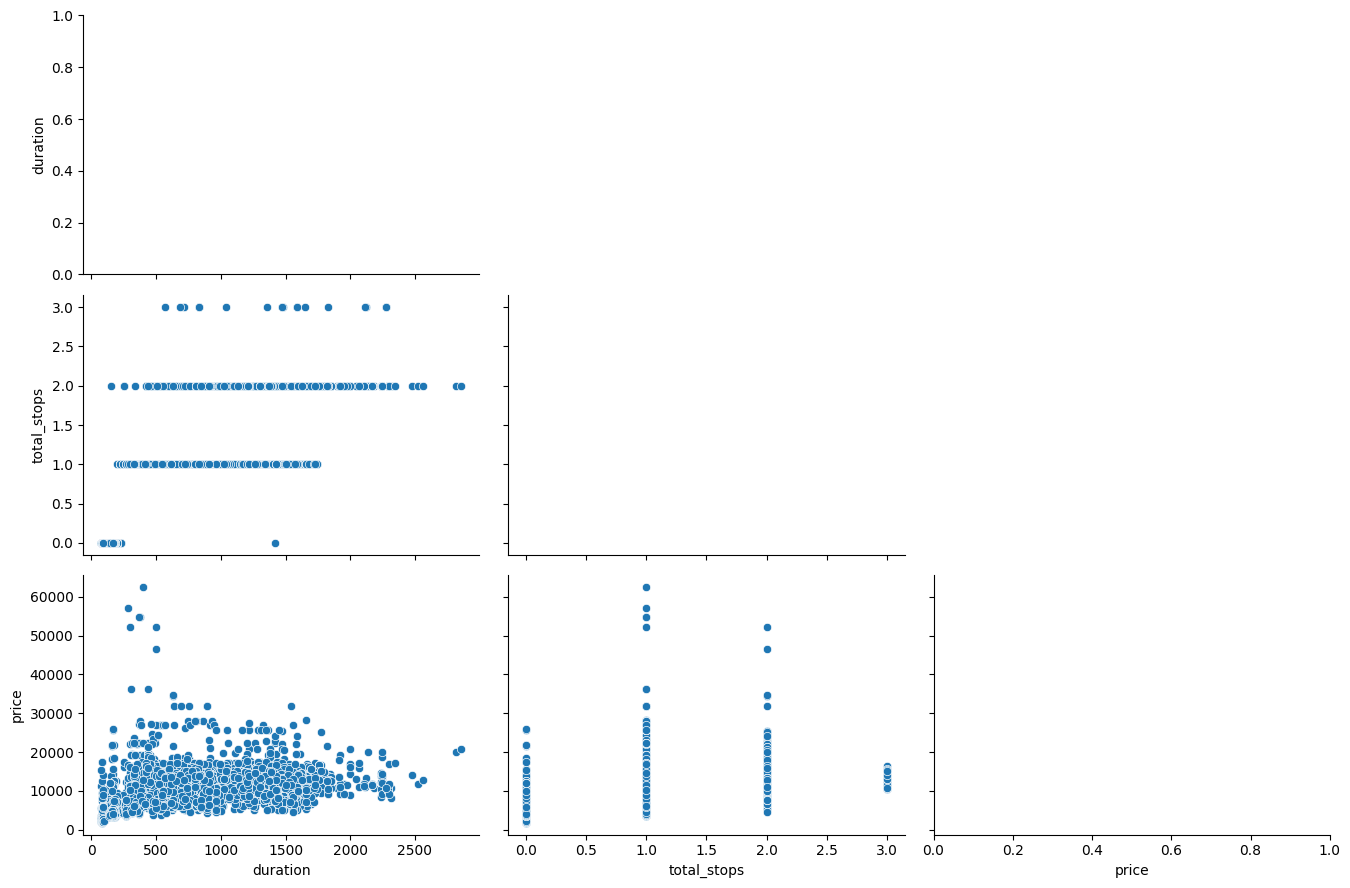

In [12]:
eda_helper_functions.pair_plots(train)

- Same for heatmap it only takes numerical columns

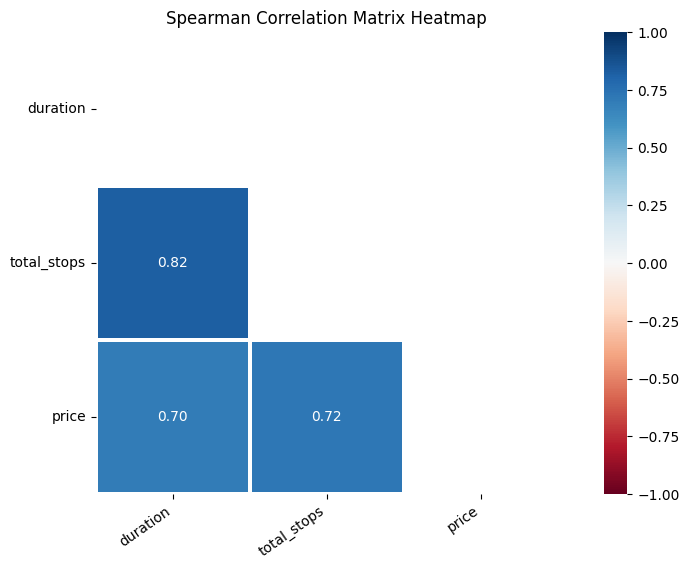

In [13]:
eda_helper_functions.correlation_heatmap(train)

- This is applied on Categorical variables as cramersV work better on categorical because it uses chi-square 

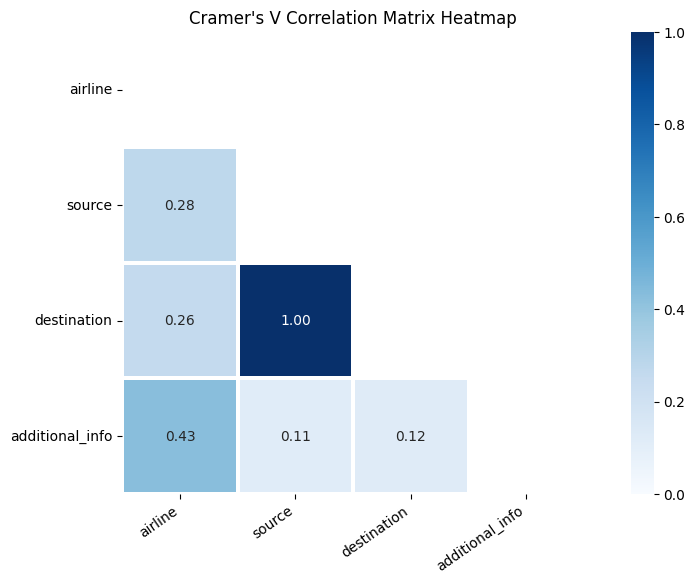

In [14]:
eda_helper_functions.cramersV_heatmap(train)

# Detailed Analysis

### Airline

In [18]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [20]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

In [22]:
eda_helper_functions.cat_summary(train, 'airline')

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 12 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,12
top,Jet Airways
freq,2386


,count,percentage
category,,
Jet Airways,2386,0.356385
Indigo,1296,0.193577
Air India,1076,0.160717
Multiple Carriers,730,0.109037
Spicejet,537,0.080209
Vistara,319,0.047647
Air Asia,211,0.031516
Goair,125,0.018671
Multiple Carriers,6,0.000896


- Gives us three charts for categorical variable in which bar chart, pie chart and word cloud
    - To remove the word cloud set it to false

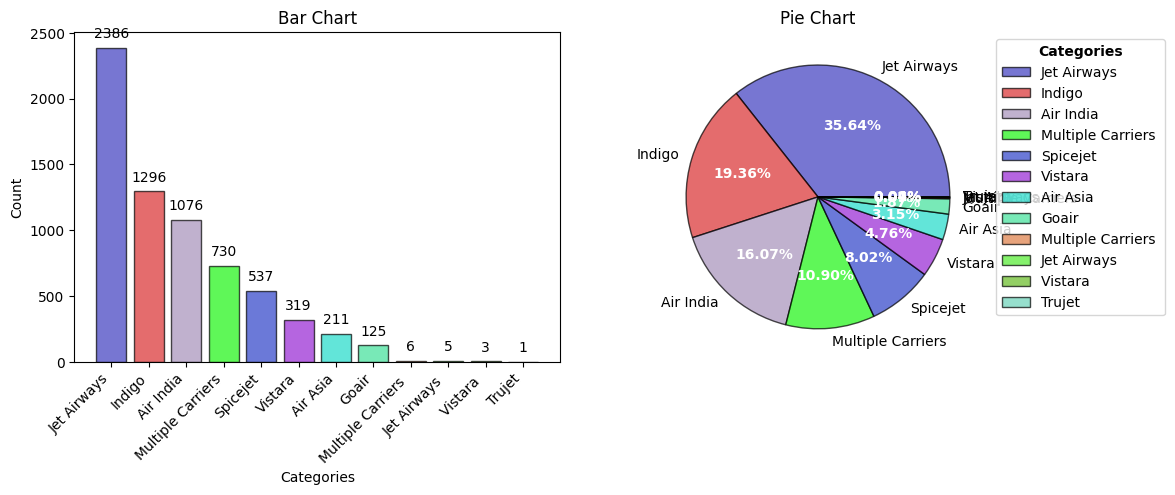

In [24]:
eda_helper_functions.cat_univar_plots(train, 'airline', show_wordcloud=False)

- We can set the value of k to how many values should be displayed from the column
  - Remaining values will automatically go under the other category

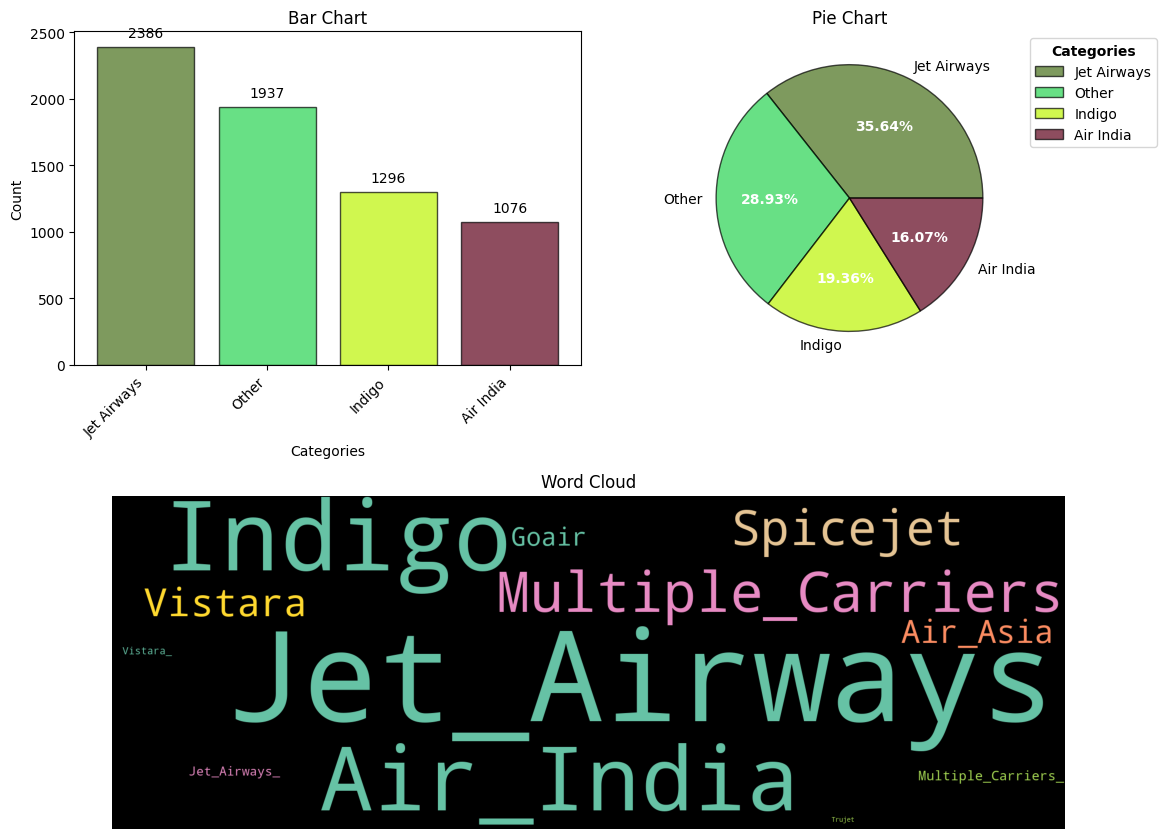

In [26]:
eda_helper_functions.cat_univar_plots(train, 'airline', k = 3)

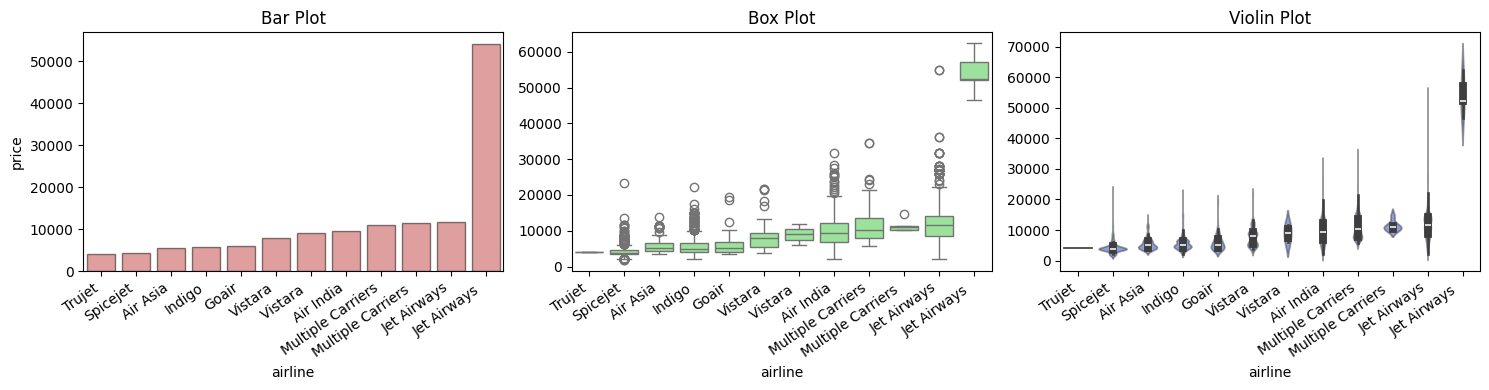

In [27]:
eda_helper_functions.num_cat_bivar_plots(train, num_var = 'price', cat_var= 'airline')

- Hypothesis testing on airline column

In [28]:
eda_helper_functions.num_cat_hyp_testing(train, 'price', 'airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 447.19740641380713
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3137.9739520926496
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


In [29]:
import seaborn as sns

- Flight price of all the flights with their destination and source 

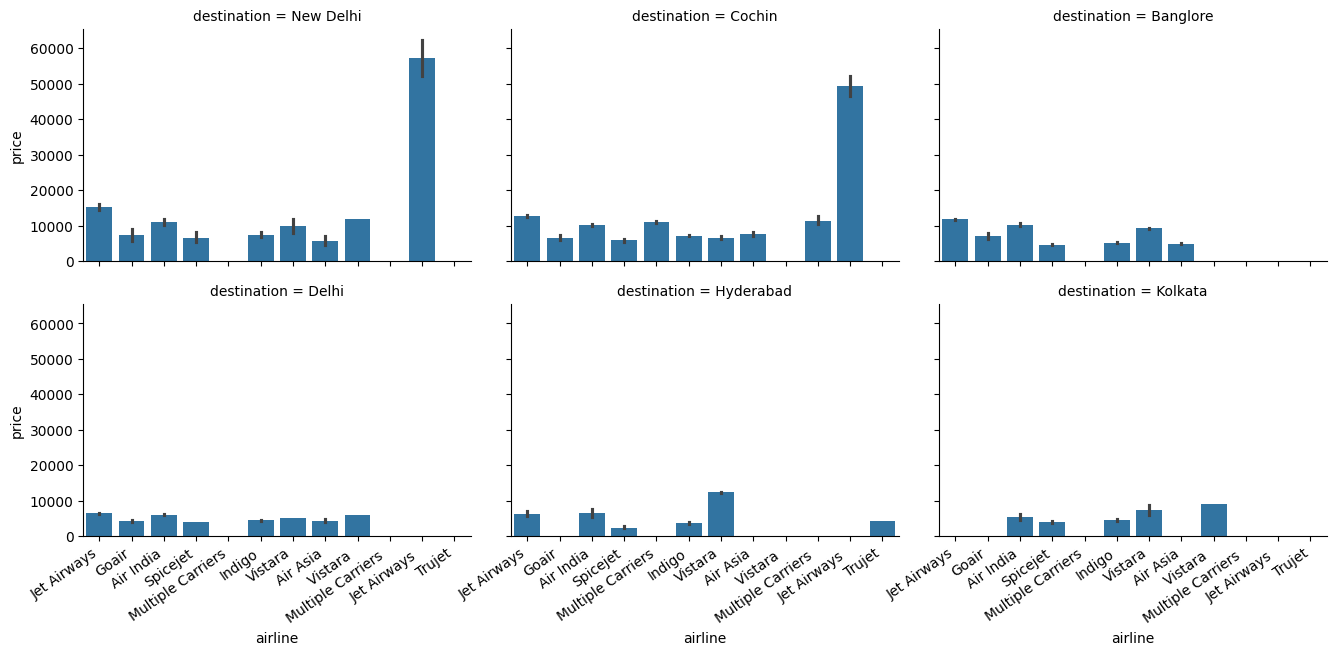

In [47]:
grid = sns.FacetGrid(
    train,
    col = 'destination',
    col_wrap=3,
    aspect=1.5

    # sharey=True
)
grid.map(sns.barplot,'airline', 'price', order=train.airline.unique())

for ax in grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

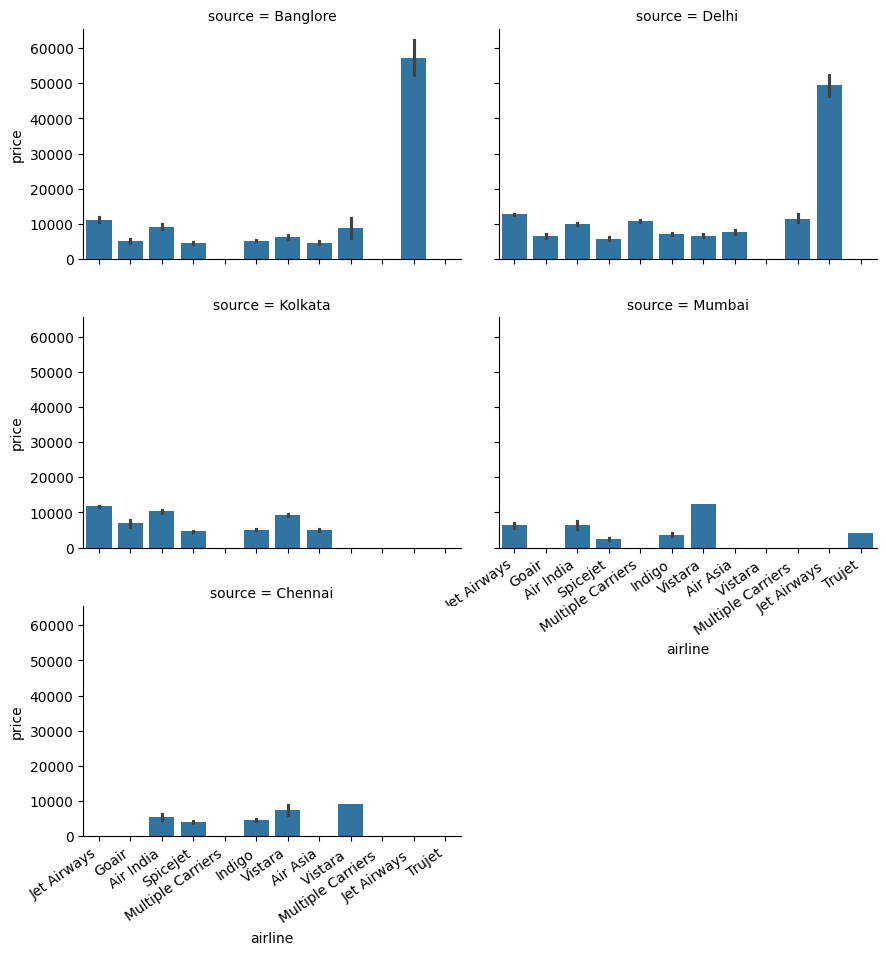

In [50]:
grid = sns.FacetGrid(
    train,
    col = 'source',
    col_wrap=2,
    aspect=1.5

    # sharey=True
)
grid.map(sns.barplot,'airline', 'price', order=train.airline.unique())

for ax in grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### Date of Journey

In [52]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6695, dtype: datetime64[ns]

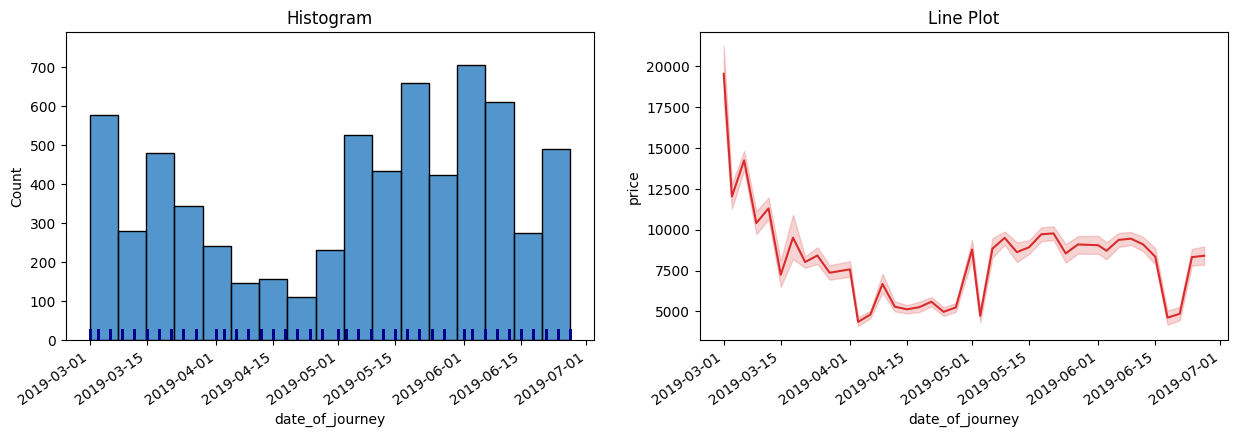

In [54]:
eda_helper_functions.dt_univar_plots(train, 'date_of_journey', 'price')

- Average tickets sale price in months

<Axes: xlabel='month'>

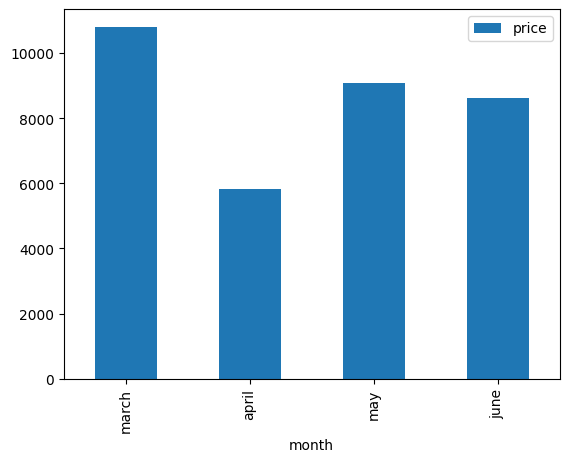

In [63]:
(
    train
        .groupby(pd.Grouper(key='date_of_journey', freq='M'))
        .price.mean()
        .to_frame()
        .set_axis(['march', 'april', 'may', 'june'])
        .rename_axis(index='month')
        .plot(kind='bar')
        
)

- Average price for the weeks

<Axes: xlabel='week'>

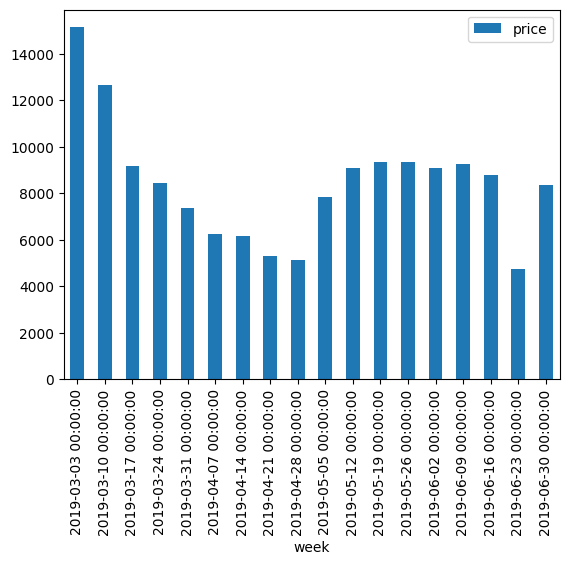

In [75]:
(
    train
        .groupby(pd.Grouper(key='date_of_journey', freq='W'))
        .price.mean()
        .to_frame()
        .rename_axis(index=['week'])
        .plot(kind='bar')
)

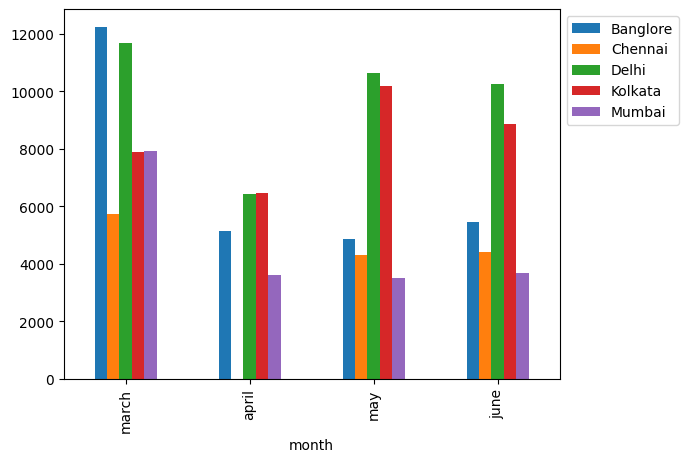

In [98]:
(
    train
        .groupby([pd.Grouper(key='date_of_journey', freq="M"), 'source'])
        .price.mean()
        .unstack(fill_value=0)
        .set_axis(['march','april','may','june'])
        .rename_axis(index='month')
        .plot(kind='bar')
)

ax = plt.gca()
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

### Dep_time

In [99]:
train.dep_time

0      2024-10-01 08:55:00
1      2024-10-01 17:30:00
2      2024-10-01 11:40:00
3      2024-10-01 09:25:00
4      2024-10-01 22:55:00
               ...        
6690   2024-10-01 10:45:00
6691   2024-10-01 09:25:00
6692   2024-10-01 14:00:00
6693   2024-10-01 07:55:00
6694   2024-10-01 11:50:00
Name: dep_time, Length: 6695, dtype: datetime64[ns]

- Tells us about peak timings 

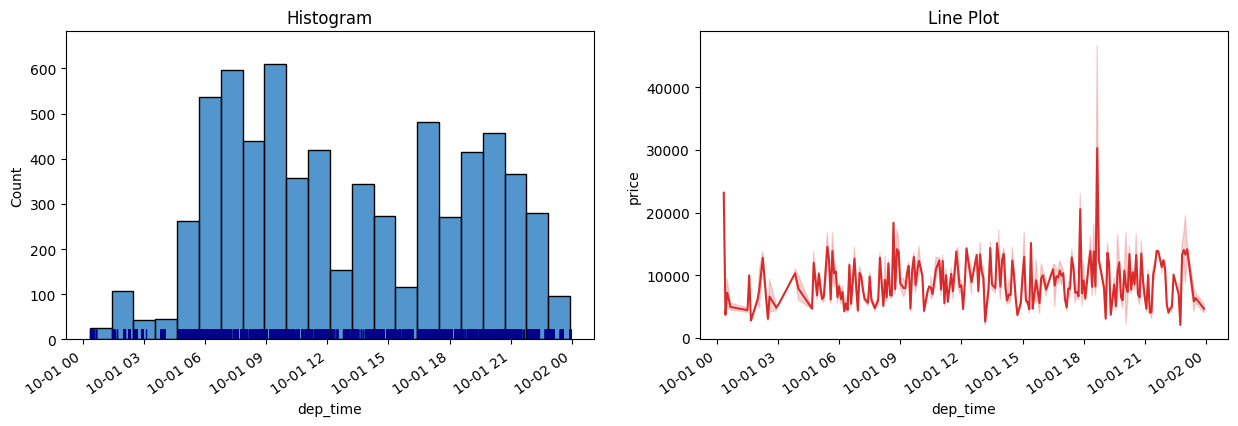

In [101]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price')

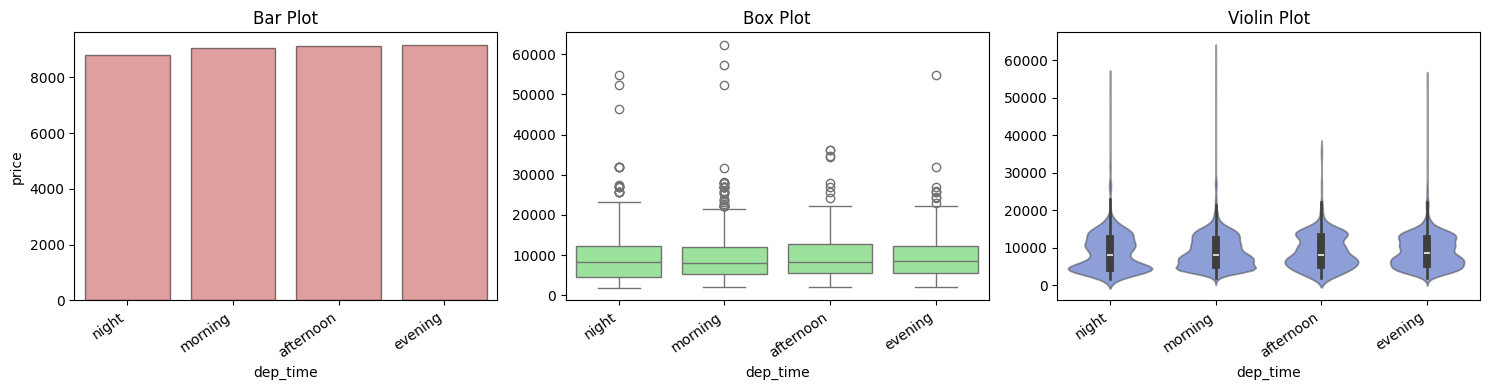

In [121]:
(
    train
    .assign(dep_time = lambda df:
            np.select([df.dep_time.dt.hour.between(4,12,inclusive='left'),
                       df.dep_time.dt.hour.between(12,16,inclusive='left'),
                       df.dep_time.dt.hour.between(16,20,inclusive='left')
                       ],
                       ['morning','afternoon', 'evening'],
                       default='night'
                     )
            )
        .pipe(eda_helper_functions.num_cat_bivar_plots,'price', 'dep_time')
)

### Duration

In [122]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

In [123]:
eda_helper_functions.num_summary(train, 'duration')

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.39934424543729e-57
Test Statistic       : 0.8865693123370929
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


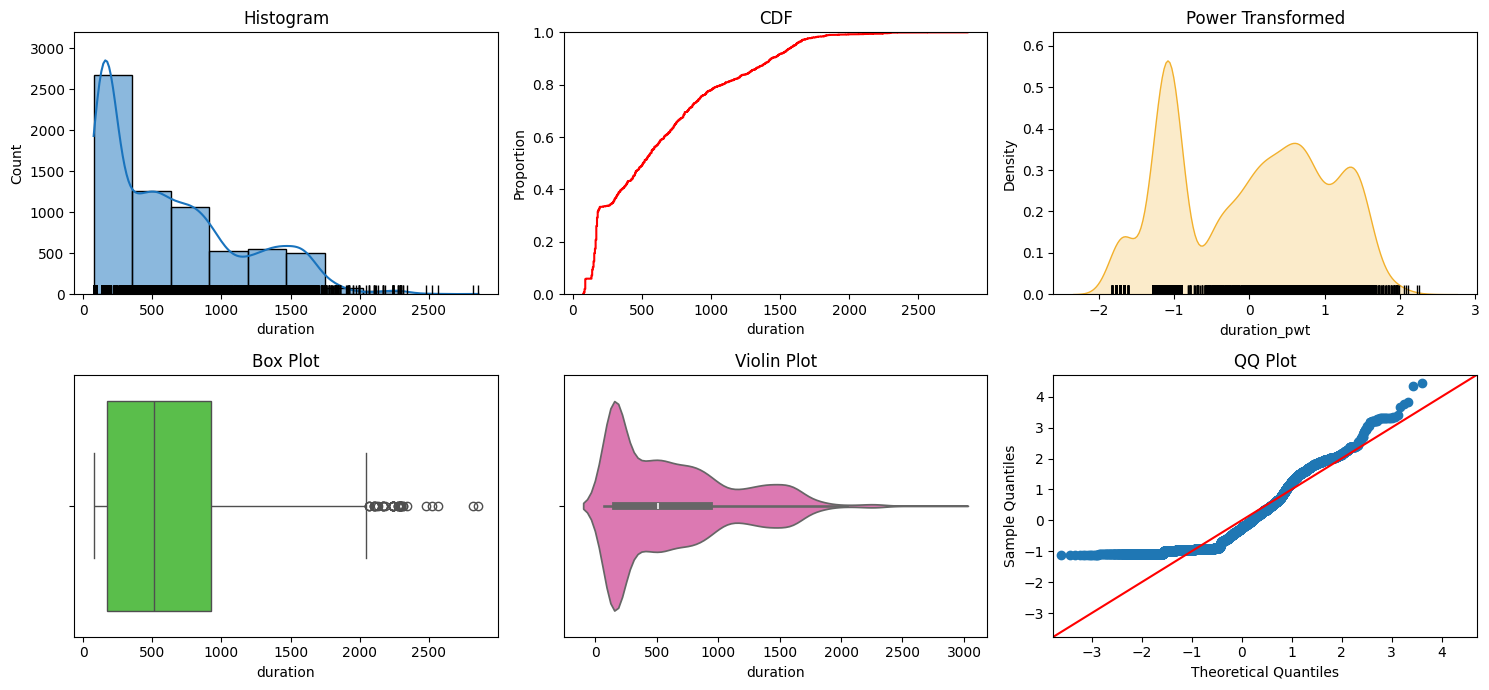

In [124]:
eda_helper_functions.num_univar_plots(train,'duration')

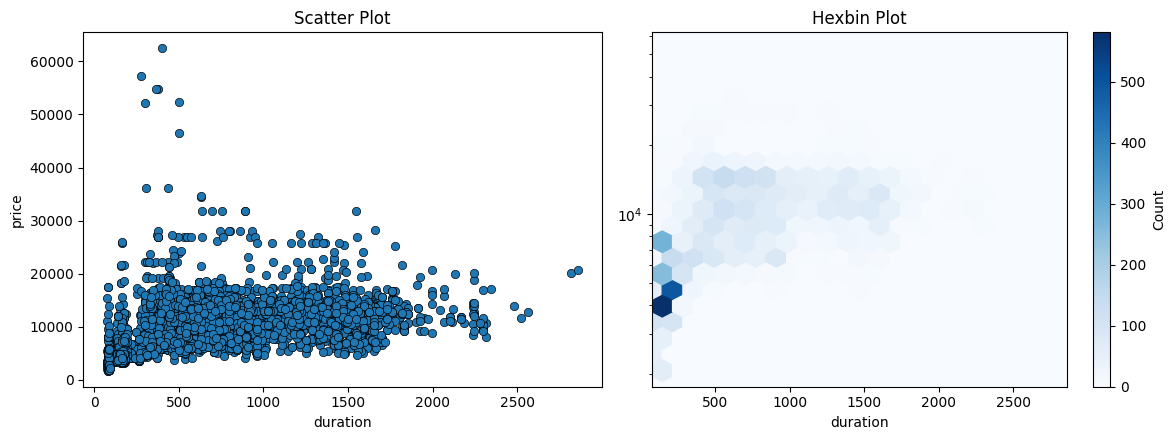

In [129]:
eda_helper_functions.num_bivar_plots(train,'duration','price', hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"))

In [131]:
eda_helper_functions.num_num_hyp_testing(train,'duration','price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.509012449177902
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978600816697789
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


In [132]:
eda_helper_functions.get_iqr_outliers(train,'duration')

Lower Limit : -958.75
Upper Limit : 2051.25


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-05-01,Kolkata,Banglore,2024-10-01 05:50:00,2024-10-01 16:15:00,2065,2,No Info,10991
3225,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-01 17:55:00,2024-10-01 04:25:00,2070,2,In-flight meal not included,15812
6079,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-01 17:55:00,2024-10-01 04:25:00,2070,2,No Info,17072
1517,Air India,2019-03-03,Banglore,New Delhi,2024-10-01 11:05:00,2024-10-01 22:10:00,2105,2,No Info,11948
4589,Air India,2019-03-18,Banglore,New Delhi,2024-10-01 11:05:00,2024-10-01 22:10:00,2105,2,No Info,11161
2990,Air India,2019-03-03,Banglore,New Delhi,2024-10-01 11:05:00,2024-10-01 22:10:00,2105,2,No Info,11791
2916,Air India,2019-05-12,Kolkata,Banglore,2024-10-01 12:00:00,2024-10-01 23:15:00,2115,3,No Info,10991
2170,Air India,2019-03-12,Banglore,New Delhi,2024-10-01 06:45:00,2024-10-01 18:05:00,2120,3,No Info,13387
1105,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-01 16:50:00,2024-10-01 04:25:00,2135,2,No Info,19907
3091,Air India,2019-03-03,Delhi,Cochin,2024-10-01 07:05:00,2024-10-01 19:15:00,2170,2,No Info,11762


### Additional Info

In [133]:
train.additional_info

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6695, dtype: object

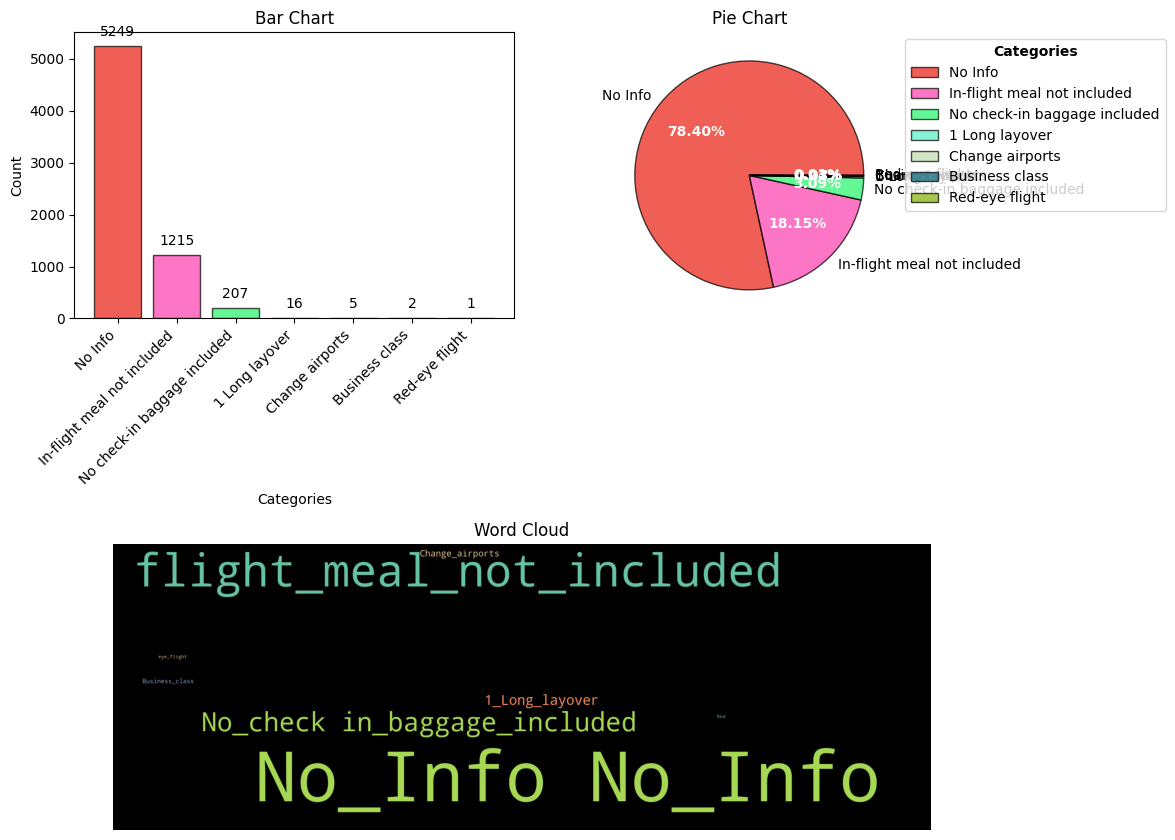

In [134]:
eda_helper_functions.cat_univar_plots(train,'additional_info')

In [137]:
eda_helper_functions.cat_summary(train,'additional_info')

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,7
top,No Info
freq,5249


,count,percentage
category,,
No Info,5249,0.784018
In-flight meal not included,1215,0.181479
No check-in baggage included,207,0.030919
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


# Automated_EDA

In [142]:
from ydata_profiling import ProfileReport

ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [139]:
report = ProfileReport(train)

NameError: name 'ProfileReport' is not defined

In [140]:
report.to_file(output_file="output.html")

NameError: name 'report' is not defined